# Text Module Example



In [1]:
import text_class_example

import sys
sys.path.append('..')
from pvops.text import utils

#import text2series_class_example  ; uncomment when completed
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\mwhopwo\AppData\Local\Programs\Python\Python36\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


## Problem statements:

### 1. Text Preprocessing
Process the documents into concise, machine learning-ready documents. Additionally, extract dates from the text.

### 2. Text Classification
The written tickets are used to make an inference on the specified event descriptor.


## Text processing 

### Import text data

In [2]:
folder = 'example_data//'
filename = 'example_ML_ticket_data.csv'
df = pd.read_csv(folder+filename)
df.head(n=3)

,Date_EventStart,Date_EventEnd,Asset,CompletionDesc,Cause,ImpactLevel,randid
0,8/16/2018 9:00,8/22/2018 17:00,Combiner,cb 1.18 was found to have contactor issue woul...,0000 - Unknown.,Underperformance,38
1,9/17/2018 18:25,9/18/2018 9:50,Pad,self resolved. techdispatched: no,004 - Under voltage.,Underperformance,46
2,8/26/2019 9:00,11/5/2019 17:00,Facility,"all module rows washed, waiting for final repo...",0000 - Unknown,Underperformance,62


### Establish settings

Specify column names which will be used in this pipeline.

In [3]:
DATA_COLUMN = "CompletionDesc"   # Contains document
LABEL_COLUMN = "Asset"           # Establish event descriptor which will be inferenced by classifiers
DATE_COLUMN = 'Date_EventStart'  # Date of ticket (start date, end date; any reflective date will do), used in date extracting pipeline to replace information not specified in ticket

### Step 0: If needed, map raw labels to a cleaner set of labels

This step is 

In [4]:
asset_remap_filename = 'remappings_asset.csv'
REMAPPING_COL_FROM = 'in'
REMAPPING_COL_TO = 'out_'
remapping_df = pd.read_csv(folder+asset_remap_filename)

In [5]:
remapping_col_dict = {
    'attribute_col': LABEL_COLUMN,
    'remapping_col_from': REMAPPING_COL_FROM,
    'remapping_col_to': REMAPPING_COL_TO
}

df_remapped_assets = utils.remap_attributes(df.iloc[30:], remapping_df.iloc[20:], remapping_col_dict, allow_missing_mappings=True)

df = df_remapped_assets

..\pvops\text\utils.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remapping_df[REMAPPING_COL_FROM] = remapping_df[REMAPPING_COL_FROM].str.lower()
..\pvops\text\utils.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remapping_df[REMAPPING_COL_TO] = remapping_df[REMAPPING_COL_TO].str.lower()


In [6]:
df[LABEL_COLUMN].value_counts()

inverter                  26
facility                  24
tracker                    6
combiner                   4
substation                 2
other                      2
meter                      1
transformer                1
pyranometer                1
energy storage/battery     1
met station                1
ground-mount pv system     1
Name: Asset, dtype: int64

### Step 1: Establish example instance and render preliminary information about the tickets

In [7]:
# Establish the class object (found in text_class_example.py)
print(df[LABEL_COLUMN].value_counts())

e = text_class_example.Example(df, LABEL_COLUMN)
e.summarize_text_data(DATA_COLUMN)

inverter                  26
facility                  24
tracker                    6
combiner                   4
substation                 2
other                      2
meter                      1
transformer                1
pyranometer                1
energy storage/battery     1
met station                1
ground-mount pv system     1
Name: Asset, dtype: int64
DETAILS
  70 samples
  0 invalid documents
  29.16 words per sample on average
  Number of unique words 881
  2041.00 total words


### Visualize timeseries of ticket publications

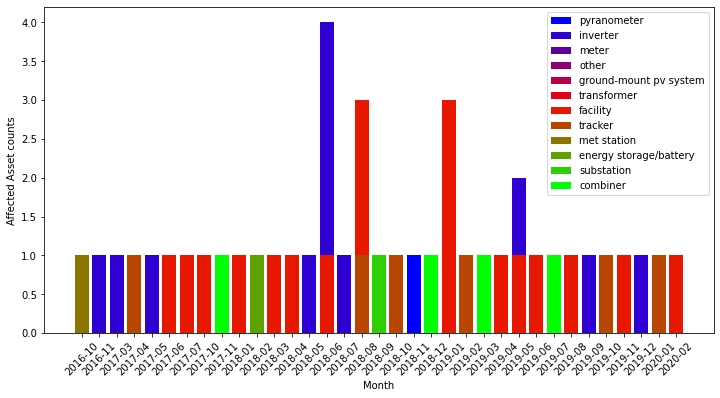

In [8]:
fig = e.visualize_attribute_timeseries(DATE_COLUMN)
plt.show()

### Functionality 1.1: Extract dates

In [9]:
# Extract date from ticket, if any. This framework is not 100% correct.
dates_df = e.extract_dates(DATA_COLUMN, DATE_COLUMN, SAVE_DATE_COLUMN='ExtractedDates')
dates_df

,CompletionDesc,ExtractedDates
0,8/39/19 inverter was faulted with lp15 (low pr...,[2019-08-17 07:35:00]
1,"11,july 2018 -upon arrival w-a6-2, inverter is...","[2018-07-11 18:55:00, 2018-06-02 18:55:00, 201..."
2,arrived site checked into c4. i was able to pi...,[2020-05-26 14:45:00]
3,c4 closed site remotely. techdispatched: no,[]
4,inspection troubleshooting malfunctioning trac...,[]
...,...,...
65,cleared cleared alert however psi is -3 invert...,[2016-11-03 09:28:00]
66,c4 closed remotely. techdispatched: no,[]
67,pure power fixed damaged source circuits did f...,"[2019-04-16 09:00:00, 2019-03-16 15:15:00]"
68,checked network connection to rm-1 didn't see ...,[]


### Functionality 1.2: Preprocess data for the Machine Learning classification

In [10]:
preprocessed_df = e.prep_data_for_ML(DATA_COLUMN, DATE_COLUMN)
preprocessed_df

,CompletionDesc,CleanDesc
0,switchgear breaker for 2.6 was tripped. breake...,switchgear breaker tripped breaker inverter tr...
1,checked network connection to rm-1 didn't see ...,checked network connection n see issues activi...
2,7/21/19 w/o 0287481 w-b10-1 upon arriving foun...,w w b upon arriving found inverter fault mode ...
3,per j. 1/24: we changed tap settings all 42 tr...,per changed tap settings transformers evening ...
4,"2, august 2018 - upon arrival inverter w-a1-2 ...",august upon arrival inverter w running checked...
...,...,...
59,"3/8/19 semi annual complete, pdf posted chatte...",semi annual complete pdf posted chatter techdi...
60,"10/2/19 e-1, row 51, e1-3-51-1. tracker tracki...",row tracker tracking wrong lubed gear boxes tr...
61,1/6: escorted onsite to change out contactor 3...,escorted onsite change contactor contactor cha...
62,upon arrival cb 2.7 was offline with board tri...,upon arrival cb offline board tripped lead boa...


### Results of text processing

In [11]:
print("Pre-text processing")
e.summarize_text_data(DATA_COLUMN)

print("\nPost-text processing")
e.summarize_text_data('CleanDesc')

Pre-text processing
DETAILS
  64 samples
  0 invalid documents
  27.95 words per sample on average
  Number of unique words 778
  1789.00 total words

Post-text processing
DETAILS
  64 samples
  0 invalid documents
  17.31 words per sample on average
  Number of unique words 489
  1108.00 total words


### Visualizing entropy of clustering technique pre- and post- processing

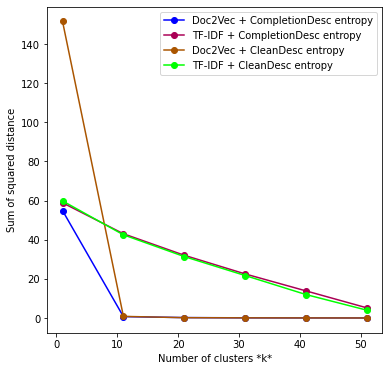

In [12]:
fig = e.visualize_cluster_entropy([DATA_COLUMN, 'CleanDesc'])
plt.show()

### Functionality 1.3: Frequency plot

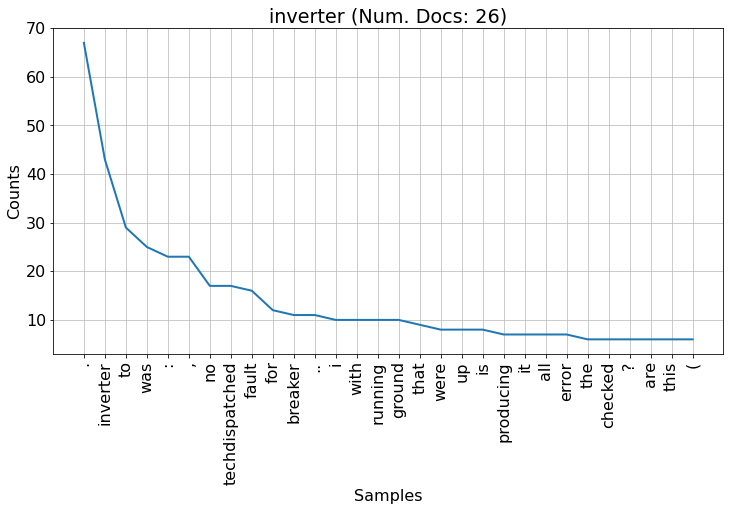

In [13]:
# Frequency plot on unprocessed data
fig = e.visualize_freqPlot(LBL_CAT='inverter', DATA_COLUMN=DATA_COLUMN)
plt.show()

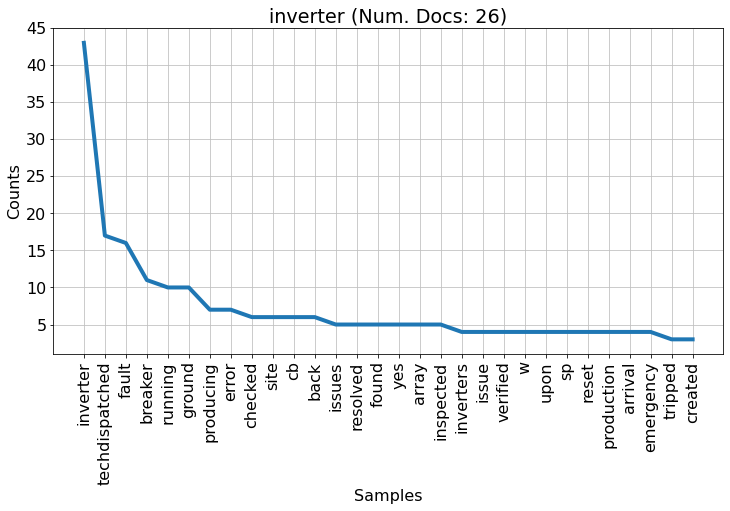

In [14]:
# Frequency plot on processed data
fig = e.visualize_freqPlot(LBL_CAT='inverter',
                            # Optional, kwargs into nltk's FreqDist
                            graph_aargs = {
                                'linewidth':4
                            }
                        )
plt.show()

### Hint: Use the below code to visualize frequency plots for all assets
    
    set_labels = list(set(e.df[e.LABEL_COLUMN].tolist()))
    for lbl in set_labels:
        fig = e.visualize_freqPlot(LBL_CAT=lbl)
        plt.show()

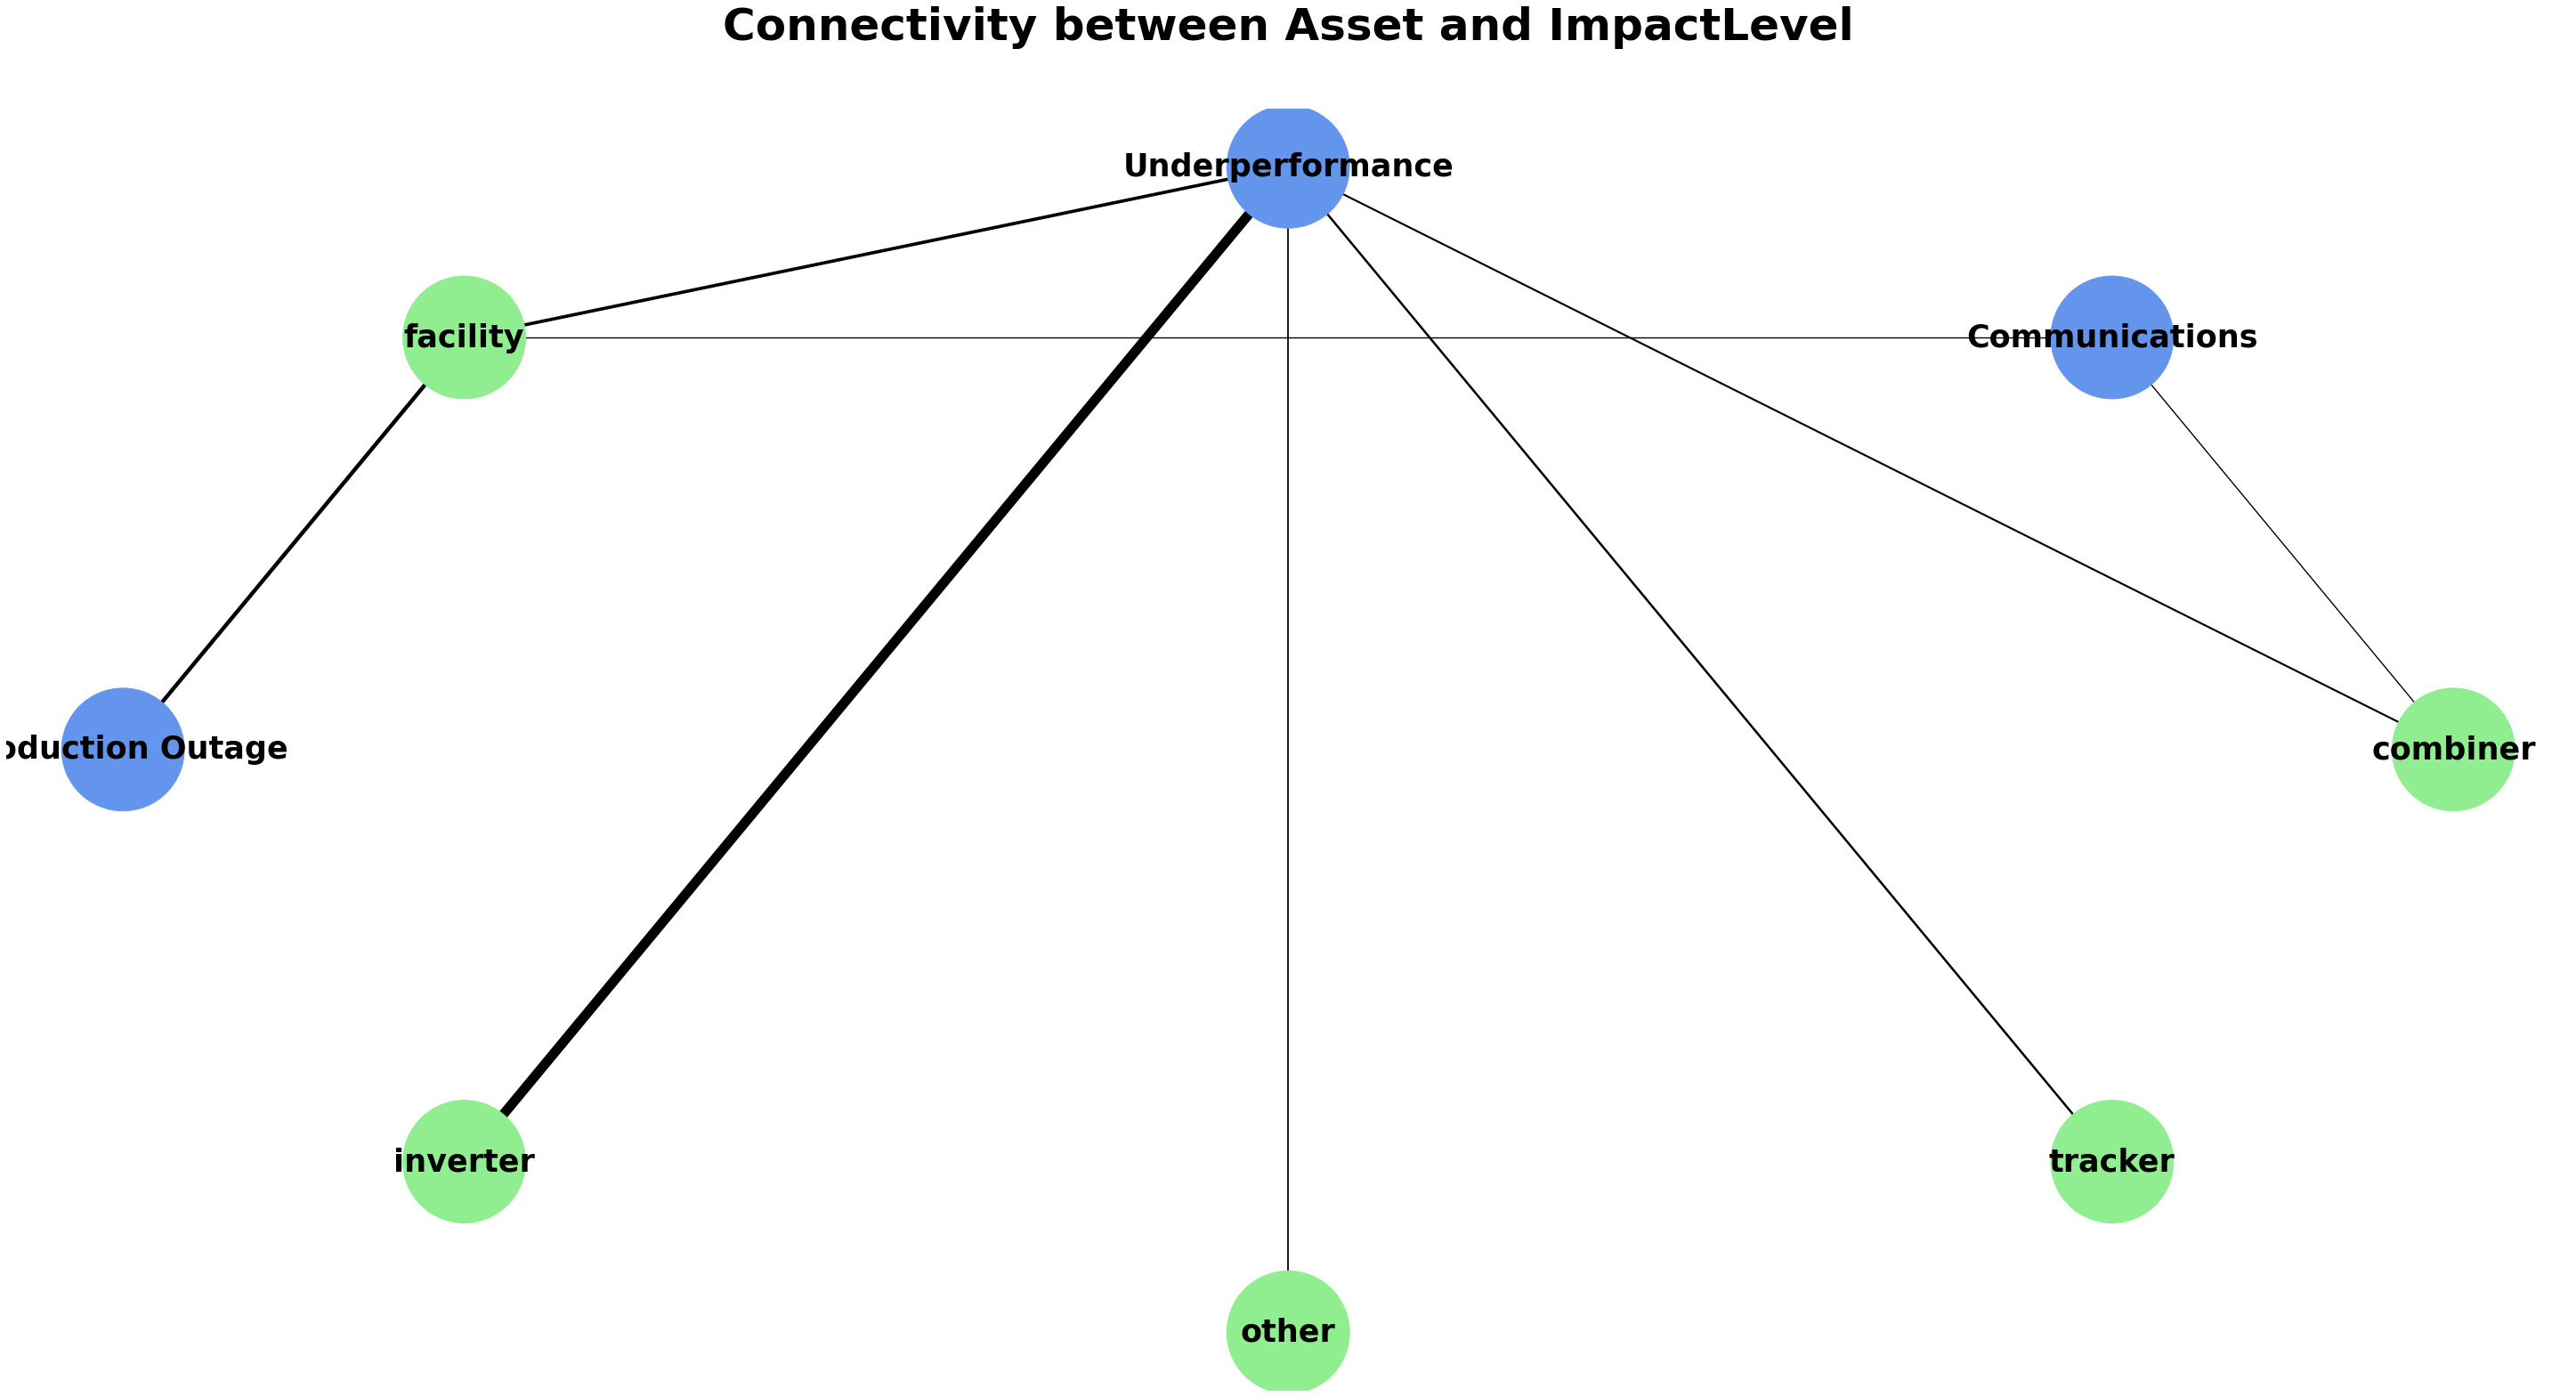

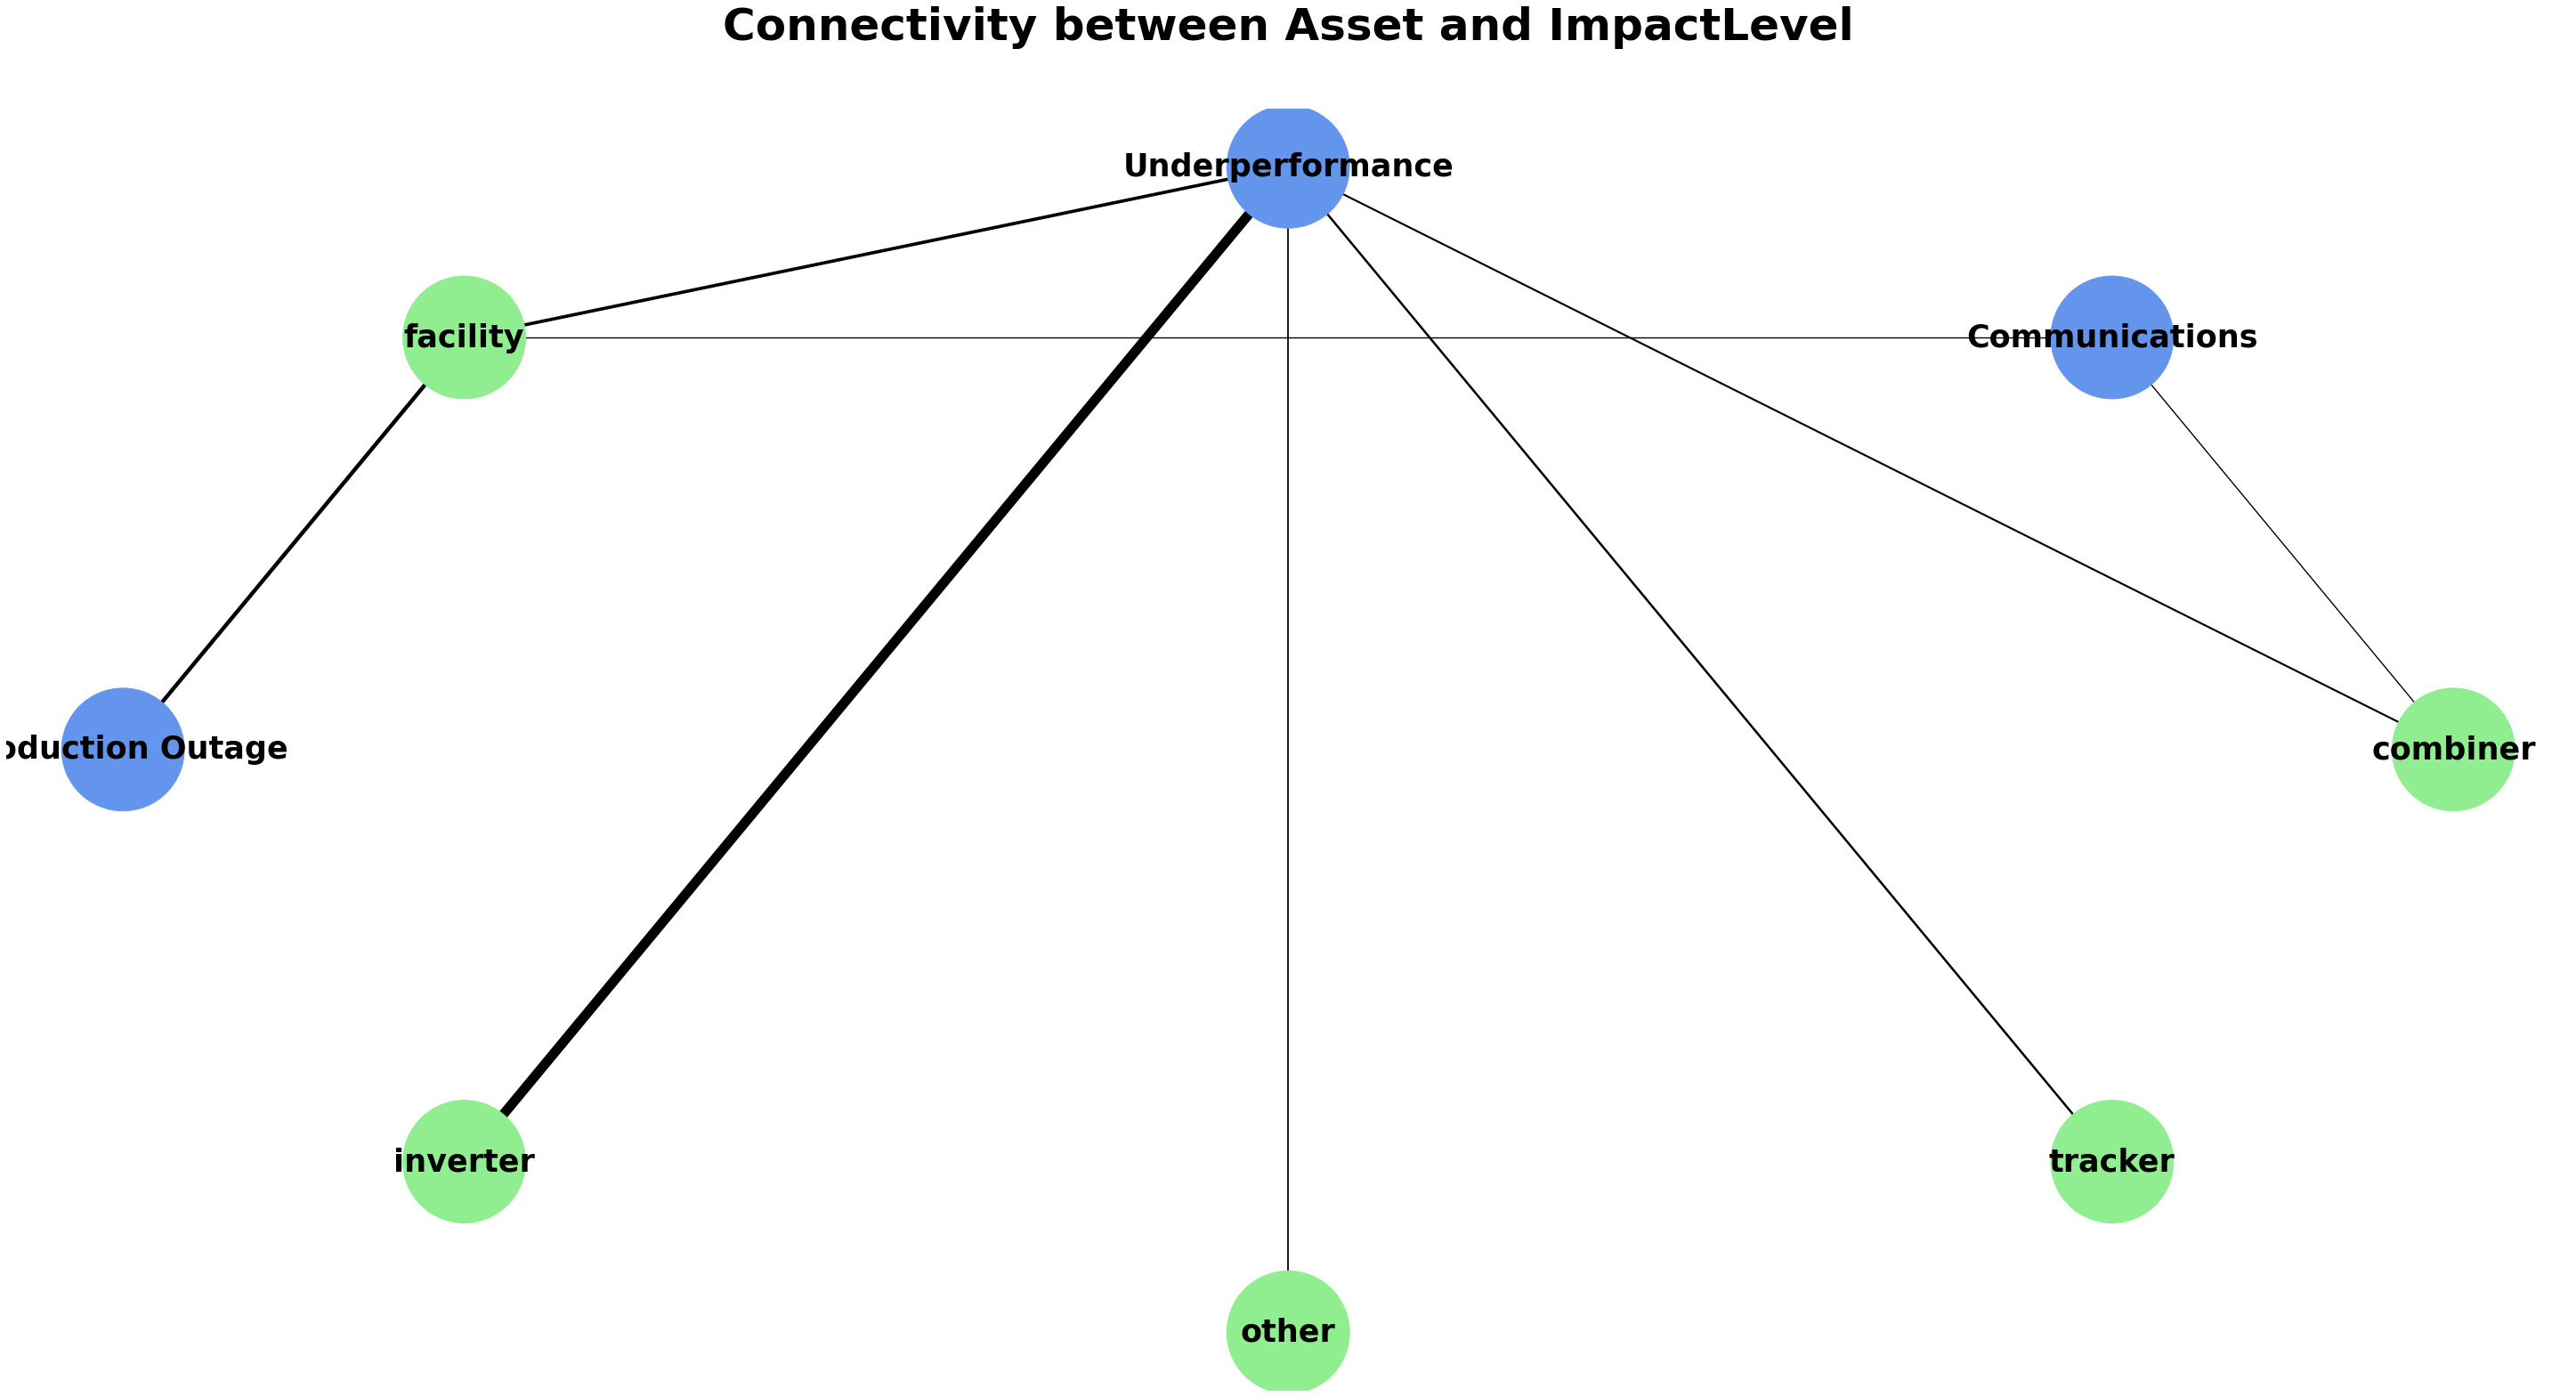

In [15]:
# Only supports two attributes
om_col_dict = {
    'attribute1_col': 'Asset',
    'attribute2_col': 'ImpactLevel'
}

fig,edges = e.visualize_attribute_connectivity(om_col_dict,
            # Optional
            graph_aargs = {'with_labels':True,
                            'font_weight':'bold',
                            'node_size':19000,
                            'font_size':35}
)
plt.show()

fig,edges = e.visualize_attribute_connectivity(om_col_dict,
            # Optional
            graph_aargs = {'with_labels':True,
                            'font_weight':'bold',
                            'node_size':19000,
                            'font_size':35}
    )
plt.show()

### Functionality 2.1: Conduct supervised classification on tickets using a cross-validated grid search

In [16]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_supervised(n_cv_splits=2, embedding='tfidf')
print('best_model', best_model)
results

Starting ML analysis with TF-IDF embeddings
C:\Users\mwhopwo\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
best_model Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('clf', PassiveAggressiveClassifier(C=0.01))])


,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__C,clf__max_iter,tfidf__ngram_range,tfidf__stop_words,...,clf__alpha,clf__batch_size,clf__hidden_layer_sizes,clf__learning_rate,clf__solver,clf__loss,clf__normalize,clf__n_estimators,clf__max_samples,clf__algorithm
41,PassiveAggressiveClassifier,0.465697,0.478473,0.49125,0.0127766,0.0374013,0.01,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,hinge,NaN,NaN,NaN,NaN
50,RidgeClassifier,0.448958,0.463344,0.47773,0.0143858,0.105717,NaN,NaN,"(1, 3)",None,...,0.001,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
26,LogisticRegression,0.418822,0.45354,0.488258,0.0347179,0.0852793,166.81,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,sag,NaN,NaN,NaN,NaN,NaN
37,LogisticRegression,0.416827,0.452542,0.488258,0.0357153,0.292719,10000,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,lbfgs,NaN,NaN,NaN,NaN,NaN
36,LogisticRegression,0.416827,0.452542,0.488258,0.0357153,0.140122,10000,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,newton-cg,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,SVC,0.234722,0.234722,0.234722,0,0.0194569,1,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,RidgeClassifier,0.00735294,0.214986,0.422619,0.207633,0.303684,NaN,NaN,"(1, 3)",None,...,0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
48,RidgeClassifier,0.00735294,0.137345,0.267338,0.129993,0.322645,NaN,NaN,"(1, 3)",None,...,0,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
40,PassiveAggressiveClassifier,0.00735294,0.00735294,0.00735294,0,0.0219419,0,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN


### Functionality 1.4: Conduct unsupervised clustering  on tickets using a cross-validated grid search

In [17]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_unsupervised(n_cv_splits=2, embedding='tfidf')
print('best_model', best_model)
results

Starting ML analysis with TF-IDF embeddings
C:\Users\mwhopwo\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)
best_model Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('to_dense', DataDensifier()), ('clf', Birch(n_clusters=6))])


,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__damping,clf__max_iter,tfidf__ngram_range,tfidf__stop_words,clf__branching_factor,clf__n_clusters,clf__threshold,clf__init,clf__n_init,clf__bandwidth,clf__bin_seeding
4,Birch,0.351161,0.401495,0.451828,0.0503332,0.048372,NaN,NaN,"(1, 3)",None,50,6,0.5,NaN,NaN,NaN,NaN
7,Birch,0.351161,0.401495,0.451828,0.0503332,0.0488698,NaN,NaN,"(1, 3)",None,100,6,0.5,NaN,NaN,NaN,NaN
0,AffinityPropagation,0.294336,0.343588,0.392841,0.0492526,0.0473619,0.5,200,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AffinityPropagation,0.294336,0.343588,0.392841,0.0492526,0.0448748,0.5,600,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AffinityPropagation,0.225831,0.309336,0.392841,0.0835048,0.0448798,0.9,200,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AffinityPropagation,0.225831,0.309336,0.392841,0.0835048,0.0383855,0.9,600,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,KMeans,0.228457,0.308919,0.389381,0.0804616,0.462265,NaN,NaN,"(1, 3)",None,NaN,6,NaN,random,100,NaN,NaN
14,KMeans,0.214882,0.281594,0.348306,0.066712,0.268284,NaN,NaN,"(1, 3)",None,NaN,6,NaN,random,50,NaN,NaN
12,KMeans,0.19116,0.271108,0.351057,0.0799487,0.926027,NaN,NaN,"(1, 3)",None,NaN,6,NaN,k-means++,100,NaN,NaN
10,KMeans,0.134596,0.266023,0.397451,0.131427,0.14562,NaN,NaN,"(1, 3)",None,NaN,6,NaN,k-means++,10,NaN,NaN


In [18]:
e.predict_best_model(ml_type = 'supervised')

Best algorithm found:
 Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('clf', PassiveAggressiveClassifier(C=0.01))])
Predictions stored to Supervised_Pred_Asset in `df` attribute
Score: 0.9524872448979591


In [19]:
e.predict_best_model(ml_type = 'unsupervised')

Best algorithm found:
 Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('to_dense', DataDensifier()), ('clf', Birch(n_clusters=6))])
Predictions stored to Unsupervised_Pred_Asset in `df` attribute
Score: 0.2876823669556863


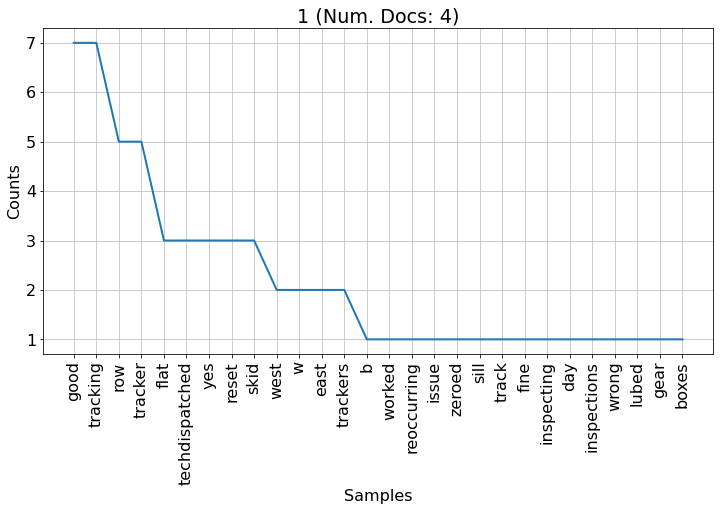

FreqDist({'good': 7, 'tracking': 7, 'row': 5, 'tracker': 5, 'flat': 3, 'techdispatched': 3, 'yes': 3, 'reset': 3, 'skid': 3, 'west': 2, ...})

In [20]:
e.LABEL_COLUMN = 'Unsupervised_Pred_Asset'
e.visualize_freqPlot(LBL_CAT = 1)

## Visualize Word Clusters

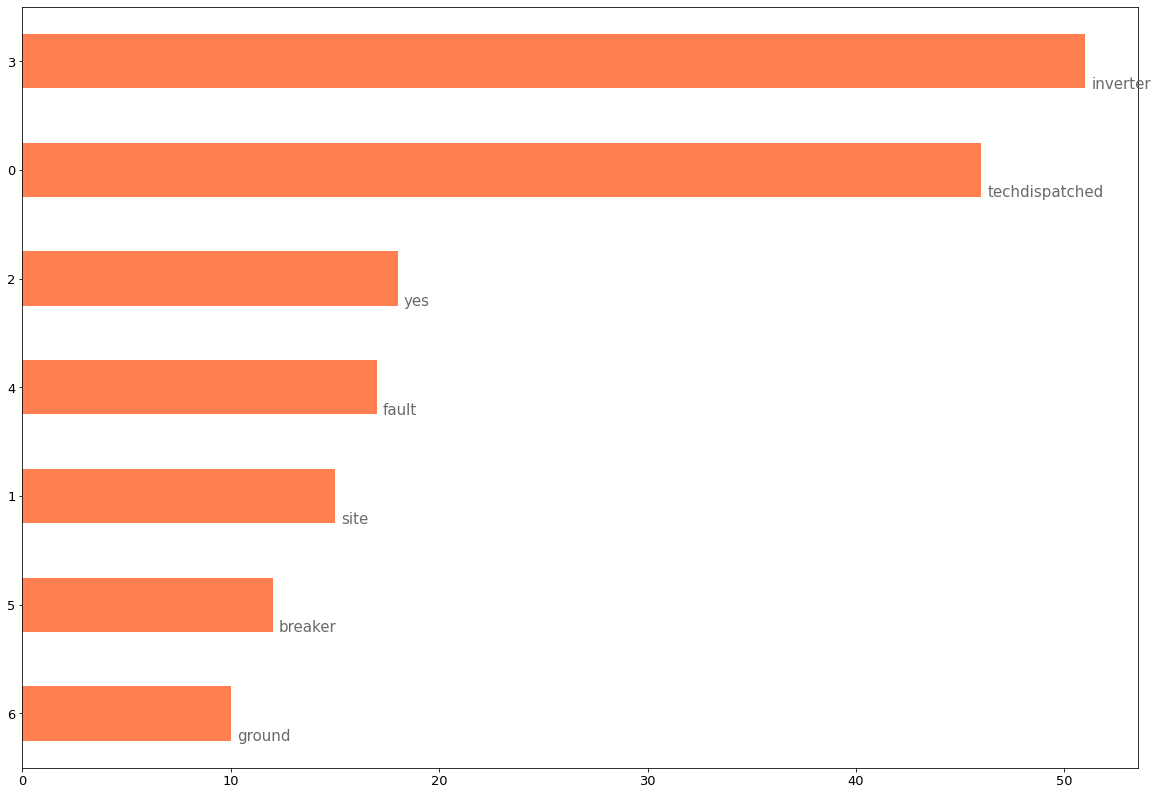

In [21]:
fig = e.visualize_document_clusters(min_frequency=10, DATA_COLUMN='CleanDesc')
plt.show()

### Seeing the popularity of `techdispatched`, one might consider adding `techdispatched` to the stopwords list